# Visualizations

Loading all necesarry packages and dtaframes that are needed for visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from textblob import TextBlob
import random

In [2]:
df=pd.read_csv('clean_df.csv',index_col=0)
sentiment=pd.read_csv('sentiment.csv',index_col=0)
google=pd.read_csv('dfg.csv',index_col=0)
apple=pd.read_csv('dfa.csv',index_col=0)

In [3]:
google['tweets']=google['tweets'].map(lambda x: eval(x))
apple['tweets']=apple['tweets'].map(lambda x: eval(x))
sentiment['tweets']=sentiment['tweets'].map(lambda x: eval(x))

In [5]:
#creatind a dataframe with the two webscraped csv.
sentiment2=pd.merge(google,apple, on='company',how='right')
sentiment2["tweet"]=''
for i in sentiment2.index:
    if type(sentiment2.company[i])!= float:
        if type(sentiment2.tweets_x[i])== float:
            sentiment2['tweet'][i]=sentiment2.tweets_y[i]
        else:
            sentiment2['tweet'][i]= sentiment2.tweets_x[i]+sentiment2.tweets_y[i]
sentiment2=sentiment2.drop(['tweets_x','tweets_y'],axis=1).drop(1,axis=0)
sentiment2.reset_index(drop=True,inplace=True)       

In [7]:
sentiment2.to_csv('Sentiment2.csv')

In [8]:
# Calculate the polarity for each piece of text for both df.

polarity_transcript_2020 = []
for lp in sentiment2.tweet:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_piece.sort()
    polarity_transcript_2020 .append(polarity_piece)

In [9]:
polarity_transcript_2011 = []
for lp in sentiment.tweets:
    lp.pop()
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_piece.sort()
    polarity_transcript_2011 .append(polarity_piece)

In [10]:
#creating a comparable sample for each company.
index=0
sampling_2020=[]
for i in range(len(polarity_transcript_2020)):
    hold=polarity_transcript_2020[i]
    if len(hold)>100:
        print("Saved_index: "+str(index)+" Company: "+sentiment2.company[i])
        sampling_2020.append(random.choices(hold, k=1000))
        index+=1
for i in range(len(sampling_2020)):
    sampling_2020[i].sort()

Saved_index: 0 Company: Apple
Saved_index: 1 Company: Iphone
Saved_index: 2 Company: Apple & Google
Saved_index: 3 Company: Google


In [11]:
sampling_2011=[]
index=0
for i in range(len(polarity_transcript_2011)):
    hold=polarity_transcript_2011[i]
    if len(hold)>100:
        print("Saved_index: "+str(index)+" Company: "+sentiment.company[i])
        sampling_2011.append(random.choices(hold, k=1000))
        index+=1
for i in range(len(sampling_2011)):
    sampling_2011[i].sort()

Saved_index: 0 Company: iPhone
Saved_index: 1 Company: iPad
Saved_index: 2 Company: Google
Saved_index: 3 Company: Android
Saved_index: 4 Company: Apple
Saved_index: 5 Company: Iphone & Android


# Plotting

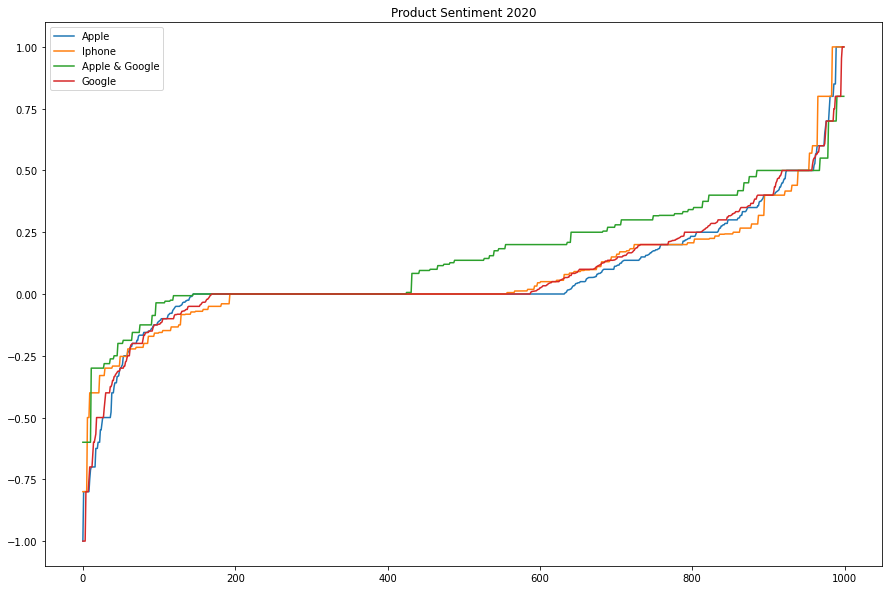

In [26]:
plt.figure(figsize=(15,10))
plt.plot(sampling_2020[0])
plt.plot(sampling_2020[1])
plt.plot(sampling_2020[2])
plt.plot(sampling_2020[3])
plt.title('Product Sentiment 2020')
plt.legend(labels=["Apple",'Iphone','Apple & Google','Google'])
plt.show()

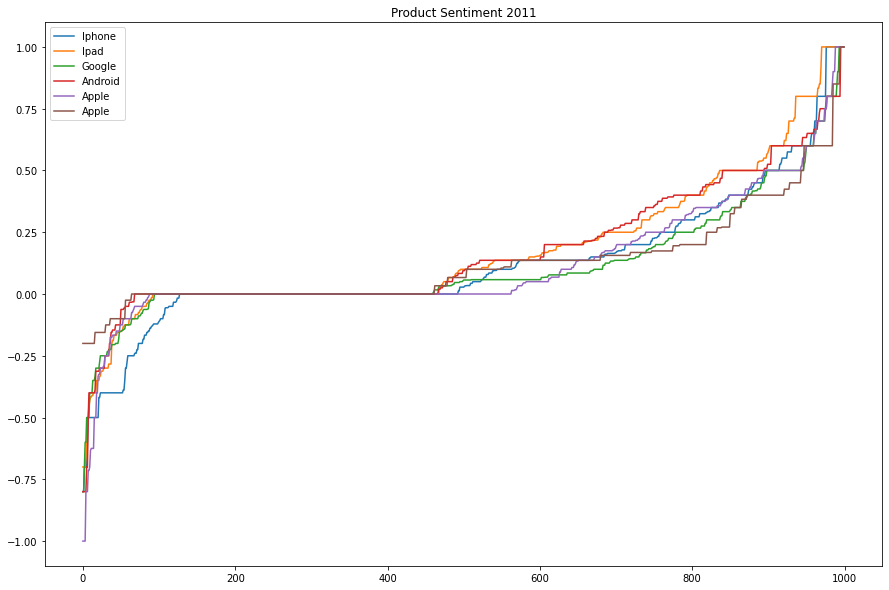

In [25]:
plt.figure(figsize=(15,10))
plt.plot(sampling_2011[0])
plt.plot(sampling_2011[1])
plt.plot(sampling_2011[2])
plt.plot(sampling_2011[3])
plt.plot(sampling_2011[4])
plt.plot(sampling_2011[5])
plt.title('Product Sentiment 2011')
plt.legend(labels=['Iphone','Ipad','Google','Android','Apple','Apple','Iphone & Android'])
plt.show()

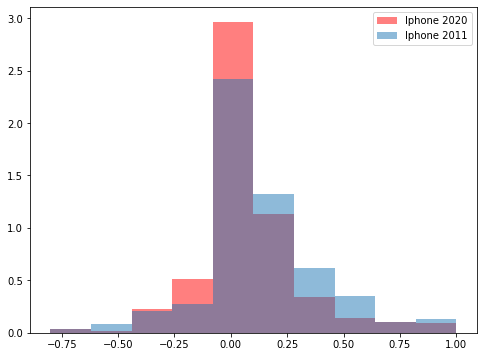

In [14]:
plt.figure(figsize=(8,6))
plt.hist(sampling_2020[1], bins=10, alpha=0.5, label="", density=True, stacked=True, color='Red')
plt.hist(sampling_2011[0], bins=10, alpha=0.5, label="", density=True)
plt.legend(labels=['Iphone 2020','Iphone 2011'])
plt.show()

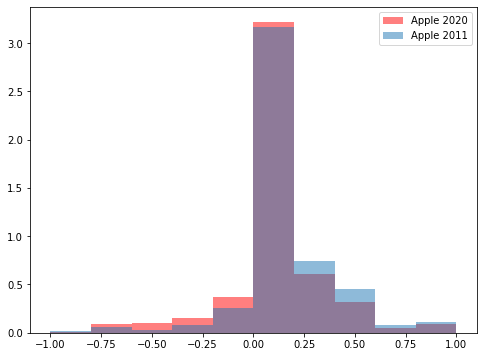

In [15]:
plt.figure(figsize=(8,6))
plt.hist(sampling_2020[0], bins=10, alpha=0.5, label="", density=True, stacked=True, color='Red')
plt.hist(sampling_2011[4], bins=10, alpha=0.5, label="", density=True)
plt.legend(labels=['Apple 2020','Apple 2011'])
plt.show()

In [37]:
def mean_emotion(name, title,df):
    if name == 'google':
        x,y=6,9
    elif name == 'apple':
        x,y=3,6
    elif name == 'iphone':
        x,y=39,43
    elif name == 'android':
        x,y=0,3
        

    dfg=df[["company",'emotion','tweet']].groupby(["company",'emotion']).count()[x:y]
    t=dfg['tweet'][0]+dfg['tweet'][1]+dfg['tweet'][2]
    for i in range(3):
        dfg['tweet'][i]=dfg['tweet'][i]*100/t
    return dfg

In [36]:
df[["company",'emotion','tweet']].groupby(["company",'emotion']).count()

tweet
company                         emotion                                  
Android                         Negative emotion                       18
                                No emotion toward brand or product    227
                                Positive emotion                      151
Apple                           Negative emotion                      110
                                No emotion toward brand or product   1119
                                Positive emotion                      817
Apple & Android                 No emotion toward brand or product      3
                                Positive emotion                        3
Apple & Google                  Negative emotion                        1
                                No emotion toward brand or product     14
                                Positive emotion                        8
Google                          Negative emotion                      132
                                No emotion toward brand or product   1599
                                Positive emotion                      665
Ipad & Android                  No emotion toward brand or product     20
                                Positive emotion                        4
Ipad & Google                   No emotion toward brand or product      3
                                Positive emotion                        2
Iphone & Android                Negative emotion                        4
                                No emotion toward brand or product     97
                                Positive emotion                       39
Iphone & Google                 No emotion toward brand or product      1
                                Positive emotion                        1
Ipod                            No emotion toward brand or product     12
                                Positive emotion                        5
Ipod & Android                  Negative emotion                        1
Mac                             Negative emotion                        2
                                No emotion toward brand or product     13
                                Positive emotion                       14
Mac & Android                   Positive emotion                        1
Other Apple product or service  Positive emotion                       12
Other Google product or service Negative emotion                        1
                                Positive emotion                        1
iPad                            Negative emotion                      150
                                No emotion toward brand or product    893
                                Positive emotion                      745
iPad or iPhone App              Negative emotion                        5
                                No emotion toward brand or product      1
                                Positive emotion                       48
iPhone                          Negative emotion                      140
                                No emotion toward brand or product    630
                                Positive emotion                      435

[]

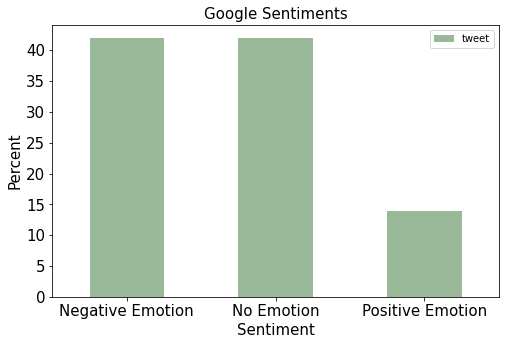

In [38]:
ax=mean_emotion('google',"brand",df).plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Google Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()

[]

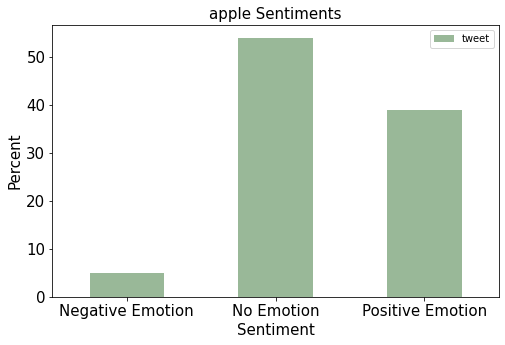

In [42]:
ax=mean_emotion('apple',"brand",df).plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('apple Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()

[]

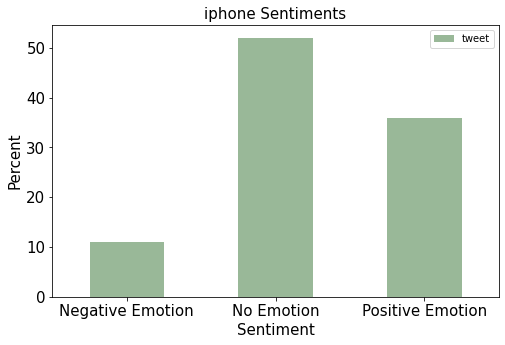

In [43]:
ax=mean_emotion('iphone','company',df).plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('iphone Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()

[]

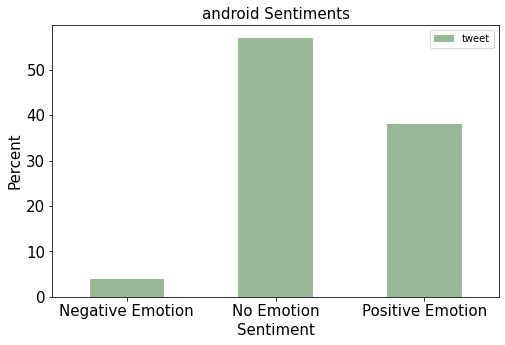

In [44]:
ax=mean_emotion('android','company',df).plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('android Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()